# workshop project

The goal is to implement algorithms for (sparse) linear regression and to
conduct experiments
The implementations and experiments should be conducted using python
in a jupyter notebook. Every function you implement should have a doc
strings that describes the role of the function arguments, the effect of the
function, and the output of the function. Your code should not access the
filesystem in any way.
Do at least two of the optional steps. (You can also propose to me other
experiments that you want to carry out instead.)

In [2]:
# Author: Donglin Zhan <@>

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Implement a function draw_observation that given a matrix A and a
vector $x^{0}$, outputs a realization of the random variable $
A x^{0}+\boldsymbol{w}
$, where
w is a standard Gaussian.

In [4]:
def draw_observation(A, x0):
    """computes a random variable np.dot(A, x0) + w
       w ~ Gaussian(loc = 0., scale = 1.)
    
    This function computes a random variable Ax0+w, where
    w is a standard Gaussian.
    
    
    Parameters
    ----------
    A: {array-like, matrix}, shape (n, d)
       Known matrix
       
    x0: ndarray, shape (d,)
       Unknown vector
       
    Returns
    -------
    draw_observation: ndarray, shape(n,)
    
    
    """
    w = np.random.normal(size = A.shape[0])
    return np.dot(A,x0) + w

Implement a function prediction_error that given $
A, x^{0}, x
$ outputs
the square prediction error $
1 / n \cdot\left\|A x-A x^{0}\right\|^{2}
$

In [5]:
def prediction_error(A, x0, x):
    """
    This function computes the square prediction error 
    
    Parameters
    ----------
    A: {array-like, matrix}, shape (n, d)
       Known matrix
       
    x0: ndarray, shape (d,)
       Unknown vector
    
    x: ndarray, shape (n,)
       Estimation vector    
       
    Returns
    -------
    prediction_error: float

        
    """
    return 1/(A.shape[0])*(np.linalg.norm(np.dot(A, x) - np.dot(A, x0), ord=2) ** 2)

Implement a function loglikelihood that given $
A, x, y
$ outputs the
(scaled) log likelihood $
1 / n \cdot\|A x-y\|^{2}
$

$$
f(y ; x)=\frac{1}{{\sqrt{2 \pi}}^{n}} e^{-| | y-A x| |^{2} / 2}
$$

In [6]:
def loglikelihood(A, x, y):
    """
    This function computes the  (scaled) log likelihood 
    
    Parameters
    ----------
    A: {array-like, matrix}, shape (n, d)
       Known matrix
       
    x: ndarray, shape (d,)
       Unknown vector
    
    y: ndarray, shape (n,)
       Array of labels.    
       
    Returns
    -------
    loglikelihood: float
        
    """    
    return 1/np.power(np.sqrt(2*np.pi), A.shape[0]) * np.exp(-1*np.linalg.norm(y - np.dot(A, x))/2)


Implement a function gradient that given $
A, x, y
$ outputs the gradient
of the above log likelihood function with respect to x

$$
f(y ; x)=-\frac{1}{{\sqrt{2 \pi}}^{n}} e^{-| | y-A x| |^{2} / 2}[({A}^{T}Ax-{A}^{T}y)]
$$

In [7]:
def gradient(A, x, y):
    """
    This function computes the gradient of (scaled) log likelihood 
    
    Parameters
    ----------
    A: {array-like, matrix}, shape (n, d)
       Known matrix
       
    x: ndarray, shape (d,)
       UnKnown vector
    
    y: ndarray, shape (n,)
       Array of labels.    
       
    Returns
    -------
    gradient: float
        
    """    
    return loglikelihood(A,x,y)*(np.dot(A.T,y)-np.dot(np.dot(A.T,A),x))

Implement a function gradient_descent that given $A, y, T, \gamma, x^{i n i t}$
; $x^{i n i t}$
runs gradient descent starting at xinit for T steps with step size 
.
This function should use the previous one to compute a gradient in
each step. The output of the function should be an array of all T + 1
iterates that gradient descent computed.

In [8]:
def gradient_descent(A, y, T, gamma, x_init):
    """
    This function implements gradient descent
    
    Parameters
    ----------
    A: {array-like, matrix}, shape (n, d)
       Known matrix
       
    x_init: ndarray, shape (d,)
       initial vector
    
    y: ndarray, shape (n,)
       Array of labels.    
    
    T: scalar
       step
    
    gamma: float 
       step size
    
    Returns
    -------
    x_step: ndarray
    all T + 1 iterates that gradient descent computed
    
    """
    x_step = x_init
    print('init_step: 1 x_step',x_step)
    for i in range(1,T+1):
        x_step -= gamma * gradient(A, x_step, y)
        print('step:',i+1,'x_step',x_step)
    return x_step

In [40]:
'''
Test
'''
A = np.ones([3,4])
x_init = np.ones([4])
y = np.ones([3])
T = 10
gamma = 0.01
gradient_descent(A,y,T,gamma,x_init)

init_step: 1 x_step [1. 1. 1. 1.]
step: 2 x_step [1.00042525 1.00042525 1.00042525 1.00042525]
step: 3 x_step [1.00085011 1.00085011 1.00085011 1.00085011]
step: 4 x_step [1.00127459 1.00127459 1.00127459 1.00127459]
step: 5 x_step [1.00169868 1.00169868 1.00169868 1.00169868]
step: 6 x_step [1.00212239 1.00212239 1.00212239 1.00212239]
step: 7 x_step [1.00254572 1.00254572 1.00254572 1.00254572]
step: 8 x_step [1.00296867 1.00296867 1.00296867 1.00296867]
step: 9 x_step [1.00339123 1.00339123 1.00339123 1.00339123]
step: 10 x_step [1.00381341 1.00381341 1.00381341 1.00381341]
step: 11 x_step [1.00423522 1.00423522 1.00423522 1.00423522]


array([1.00423522, 1.00423522, 1.00423522, 1.00423522])

Implement a function plot_prediction that given $A, x^{0}$ and a list of
iterates plots the prediction errors of the iterates

In [10]:
def plot_prediction(A, x0, iterates):
    """
    This function plots the prediction errors
    
    Parameters
    ----------
    A: {array-like, matrix}, shape (n, d)
       Known matrix
       
    x0: ndarray, shape (d,)
       UnKnown vector
    
    iterates: list
       Iterates contains x list
       
    Returns
    -------
    None
        
    """ 
    error_list = []
    for x in iterates:
        error_list.append(prediction_error(A,x0,x))
    plt.plot(error_list)

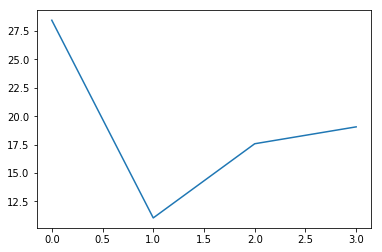

In [11]:
'''
Test plot_prediction
'''
A = np.random.normal(size = [3,4])
x0 = np.random.normal(size = 4)
iterates = []
iterates.append(np.random.normal(size = 4))
iterates.append(np.random.normal(size = 4))
iterates.append(np.random.normal(size = 4))
iterates.append(np.random.normal(size = 4))

plot_prediction(A, x0, iterates)

Implement a function plot_optimization that given $A, y$ and a list of
iterates plots the loglikelihoods of the iterates

In [12]:
def plot_optimization(A, y, iterates):
    """
    This function plots the prediction errors
    
    Parameters
    ----------
    A: {array-like, matrix}, shape (n, d)
       Known matrix
       
    y: ndarray, shape (n,)
       Array of labels.    
    
    iterates: list
       Iterates contains x list
       
    Returns
    -------
    None
        
    """ 
    likelihood_list = []
    for x in iterates:
         likelihood.append(loglikelihood(A,x,y))
    plt.plot(likelihood_list)
    

Implement a function random_unit_vector that given d outputs a
random unit vector. You can obtain such a vector by first choosing
a d-dimensional standard Gaussian vector v and then scaling this
vector by $1 /\|v\|$

In [13]:
def random_unit_vector(d):
    """
    This function generates a random unit vector
    
    Parameters
    ----------
       
    d: scalar
       dimensions of Gaussian     

    Returns
    -------
    random_unit_vector:ndarray
        
    """ 
    d_dim_normal = np.random.multivariate_normal(mean=np.zeros(d),cov = np.eye(d))
    return d_dim_normal/np.linalg.norm(d_dim_normal)

Implement a function random_model that given d and n, outputs a
matrix A and a vector x0 such that every entry of A is a standard
Gaussian and x0 is a random unit vector.

In [14]:
def random_model(d, n):
    """
    This function generates a matrix whose every entry is a 
    standard Gaussian and a vector x0 is a randoim unit vector
    
    Parameters
    ----------
       
    d: scalar
       dimensions of Gaussian     
    
    n: scalar
       number of entries
       
    Returns
    -------
    A: matrix, shape (n, d)
    x0: ndarray, shape(d,)
        
    """ 
    A = np.random.multivariate_normal(mean=np.zeros(d),cov = np.eye(d),size=n)
    x0 = random_unit_vector(d)
    return A, x0

Conduct some experiments. Choose values of d and n. Choose a step
size 
 and a number of steps T. Choose A and x0 using the function
random_model. Choose xinit as a random unit vector. Show the plots
for the prediction error and the loglikelihoods.

In [53]:
# choose n = 3, d = 4, gamma = 0.01, T = 10
n,d,gamma,T = 30,2,0.01,10
A, x0 = random_model(d,n)
x_init = random_unit_vector(d)
x_step = x_init
error_list = []
loglikelihood_list = []
# y = np.dot(A, x0)
y = draw_observation(A, x0)
for i in range(1, T+1):
    error_list.append(prediction_error(A, x0, x_step))
    loglikelihood_list.append(loglikelihood(A, x_step, y))
    x_step -= gamma * gradient(A, x_step , y)

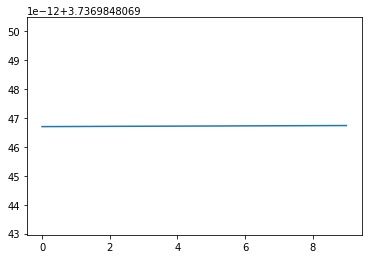

In [54]:
plt.plot(error_list)

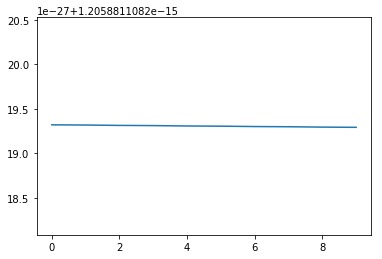

In [55]:
plt.plot(loglikelihood_list)